# CS6364 MACHINE LEARNING HW 2


### Aseem Mishra (G45760852)

Question 2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multiclass import OneVsRestClassifier

In [2]:
import nltk


# SVM

### Import Dataset

In [3]:
df = pd.read_json('friends_train.json')

df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,"{'speaker': 'Chandler', 'utterance': 'also I w...","{'speaker': 'The Interviewer', 'utterance': 'Y...","{'speaker': 'Chandler', 'utterance': 'That I d...","{'speaker': 'The Interviewer', 'utterance': 'S...","{'speaker': 'Chandler', 'utterance': 'My dutie...","{'speaker': 'The Interviewer', 'utterance': 'N...","{'speaker': 'Chandler', 'utterance': 'I see.',...","{'speaker': 'The Interviewer', 'utterance': 'B...","{'speaker': 'Chandler', 'utterance': 'Good to ...","{'speaker': 'The Interviewer', 'utterance': 'W...",...,"{'speaker': 'Joey', 'utterance': 'But then who...","{'speaker': 'Rachel', 'utterance': 'You know? ...","{'speaker': 'Joey', 'utterance': 'No-no-no-no,...","{'speaker': 'Rachel', 'utterance': 'No, I-I-I-...","{'speaker': 'Joey', 'utterance': 'Ok!', 'emoti...","{'speaker': 'Joey', 'utterance': 'All right, w...","{'speaker': 'Joey', 'utterance': 'I'm gonna se...","{'speaker': 'Joey', 'utterance': 'I'll see you...","{'speaker': 'Rachel', 'utterance': 'Yeah, sure...",None
1,"{'speaker': 'Chandler', 'utterance': 'Hey, Mon...","{'speaker': 'Monica', 'utterance': 'Hey-hey-he...","{'speaker': 'Chandler', 'utterance': 'Do I eve...","{'speaker': 'Monica', 'utterance': 'Chris says...","{'speaker': 'Chandler', 'utterance': 'No way!'...","{'speaker': 'Monica', 'utterance': 'Yeah, appa...","{'speaker': 'Chandler', 'utterance': 'Just cof...","{'speaker': 'Monica', 'utterance': 'Got me.', ...","{'speaker': 'Chandler', 'utterance': 'Can I ge...","{'speaker': 'Monica', 'utterance': 'Hey, did y...",...,"{'speaker': 'Chandler', 'utterance': 'What, wh...","{'speaker': 'Phoebe', 'utterance': 'What?!', '...","{'speaker': 'Phoebe', 'utterance': 'He was wit...","{'speaker': 'Phoebe', 'utterance': 'Look, 'My...","{'speaker': 'Phoebe', 'utterance': 'Now that I...","{'speaker': 'Phoebe', 'utterance': 'He thinks ...","{'speaker': 'Chandler', 'utterance': 'You real...","{'speaker': 'Phoebe', 'utterance': 'Oh, totall...","{'speaker': 'Joey', 'utterance': 'Done.', 'emo...",None
2,"{'speaker': 'Rachel', 'utterance': 'Hey!', 'em...","{'speaker': 'Ross', 'utterance': 'Hi!', 'emoti...","{'speaker': 'Rachel', 'utterance': 'What are y...","{'speaker': 'Ross', 'utterance': 'Ah y'know, t...","{'speaker': 'Rachel', 'utterance': 'Oh.', 'emo...","{'speaker': 'Ross', 'utterance': 'Hi.', 'emoti...","{'speaker': 'Rachel', 'utterance': 'Hi.', 'emo...","{'speaker': 'Ross', 'utterance': 'Howd did it...","{'speaker': 'Rachel', 'utterance': 'Oh well, t...","{'speaker': 'Ross', 'utterance': 'Im so proud...",...,"{'speaker': 'Rachel', 'utterance': 'Yeah.', 'e...","{'speaker': 'Phoebe', 'utterance': 'Ameri-can....","{'speaker': 'Sergei', 'utterance': 'Ameri-ccan...","{'speaker': 'Phoebe', 'utterance': 'Ameri-can....","{'speaker': 'Sergei', 'utterance': 'Everybody!...",None,None,None,None,None
3,"{'speaker': 'Chandler', 'utterance': 'Good job...","{'speaker': 'Joey', 'utterance': 'You liked it...","{'speaker': 'Chandler', 'utterance': 'Oh-ho-ho...","{'speaker': 'Joey', 'utterance': 'Which part e...","{'speaker': 'Chandler', 'utterance': 'The whol...","{'speaker': 'Joey', 'utterance': 'Oh no-no-no,...","{'speaker': 'Chandler', 'utterance': 'I love t...","{'speaker': 'Joey', 'utterance': 'Hey, what ab...","{'speaker': 'Chandler', 'utterance': 'I was su...","{'speaker': 'Joey', 'utterance': 'You fell asl...",...,"{'speaker': 'Chandler', 'utterance': 'Dont go...","{'speaker': 'Chandler', 'utterance': 'Im sorr...","{'speaker': 'Chandler', 'utterance': 'Im so s...","{'speaker': 'Chandler', 'utterance': 'Look!', ...","{'speaker': 'Chandler', 'utterance': 'This guy...","{'speaker': 'Chandler', 'utterance': 'He fell ...","{'speaker': 'Chandler', 'utterance': 'Be mad a...","{'speaker': 'Chandler', 'utterance': 'Or, call...",None,None
4,"{'speaker': 'Joey', 'utterance': 'Okay, look, ...","{'speaker': 'Ross', 'utterance': 'What?! What ...","{'speaker': 'Phoebe', 'utterance': 'Yes, and i...","{'speaker': 'Phoebe', 'utt

## Normalizing Dataset

In [4]:
df_cleaned = pd.json_normalize(df[0])

In [5]:
df_cleaned

,speaker,utterance,emotion,annotation
0,Chandler,also I was the point person on my companys tr...,neutral,4100000
1,Chandler,"Hey, Mon.",neutral,5000000
2,Rachel,Hey!,non-neutral,1200020
3,Chandler,Good job Joe! Well done! Top notch!,joy,0500000
4,Joey,"Okay, look, I think we have to tell Rachel she...",neutral,4001000
...,...,...,...,...
715,Chandler,"Excuse me, Doug? Hey there sports fan!!",joy,1400000
716,Joey,So the Porsche guy took his car back.,neutral,4010000
717,Rachel,"Hey, Mon, I was just doing the dishes!",neutral,3100010
718,Joey,Hey-hey! Stanley! Hey-hey! You're leading man ...,joy,1300100


In [6]:

for i in range (1,len(df.columns)):
    
    df_cleaned = pd.concat([df_cleaned, pd.json_normalize(df[i])])


### CHecking structure of dataset

In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17280 entries, 0 to 719
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   speaker     10561 non-null  object
 1   utterance   10561 non-null  object
 2   emotion     10561 non-null  object
 3   annotation  10561 non-null  object
dtypes: object(4)
memory usage: 675.0+ KB


## Checking for Null Values

In [8]:
df_cleaned.isnull().sum()

speaker       6719
utterance     6719
emotion       6719
annotation    6719
dtype: int64

Dropping Null Values

In [9]:
df_cleaned=df_cleaned.dropna()

In [10]:
df_cleaned.isnull().sum()

speaker       0
utterance     0
emotion       0
annotation    0
dtype: int64

### Performing Tokenization and Lemmatization along with removal of stop words

In [11]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word for word in words if word.isalnum()]  # Remove non-alphanumeric characters
    words = [word.lower() for word in words if word.lower() not in stop_words]
    # You can choose either stemming or lemmatization based on your preference
    #words = [stemmer.stem(word) for word in words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df_cleaned['processed_utterance'] = df_cleaned['utterance'].apply(preprocess_text)
df_cleaned

,speaker,utterance,emotion,annotation,processed_utterance
0,Chandler,also I was the point person on my companys tr...,neutral,4100000,also point person transition system
1,Chandler,"Hey, Mon.",neutral,5000000,hey mon
2,Rachel,Hey!,non-neutral,1200020,hey
3,Chandler,Good job Joe! Well done! Top notch!,joy,0500000,good job joe well done top notch
4,Joey,"Okay, look, I think we have to tell Rachel she...",neutral,4001000,okay look think tell rachel messed dessert
...,...,...,...,...,...
611,Chandler,The front page? You really do live in your own...,non-neutral,1100021,front page really live little world ya
636,Phoebe,Oh my God!Eh! Well,surprise,1100030,oh god well
647,Monica,"How would that go? Well, it didn't rhyme, but...",joy,2300000,would go well rhyme liked
660,Allesandro,How long is this gonna take? Cause I got anot...,neutral,3100100,long gon na take got another critic go yell


### Target Variable Distribution

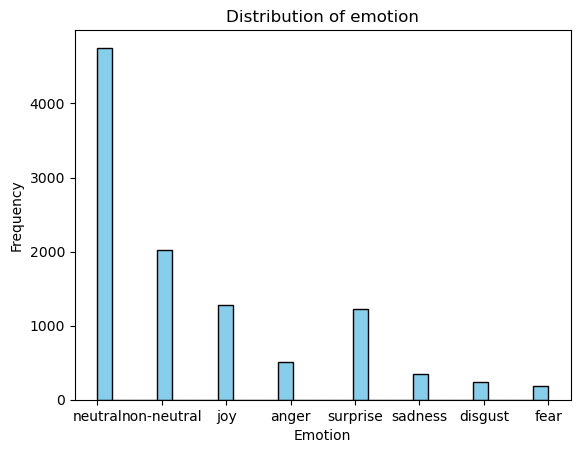

In [12]:
plt.hist(df_cleaned['emotion'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of emotion')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.show()

### Applying TFID to convert String to Number

In [13]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_cleaned['processed_utterance'])
#tfidf_matrix.toarray()
df_tf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

df_cleaned = df_cleaned.reset_index(drop=True)
df_tf = df_tf.reset_index(drop=True)

df_cleaned_pre = pd.concat([df_cleaned, df_tf], axis=1)
# print(res['hey'])
#tfidf_matrix 

### CHecking for all types of emotions in dataset and assigning number to it

In [14]:
df_cleaned_pre.emotion.unique()

array(['neutral', 'non-neutral', 'joy', 'anger', 'surprise', 'sadness',
       'disgust', 'fear'], dtype=object)

In [15]:
df_cleaned_pre['emotion'] = df_cleaned_pre['emotion'].map({'neutral':0, 'non-neutral':1, 'joy':2, 'anger':3, 'surprise':4, 'sadness':5,
       'disgust':6, 'fear':7})
df_cleaned_pre['emotion'] .info()

<class 'pandas.core.series.Series'>
RangeIndex: 10561 entries, 0 to 10560
Series name: emotion
Non-Null Count  Dtype
--------------  -----
10561 non-null  int64
dtypes: int64(1)
memory usage: 82.6 KB


### Creating X and Y for our model

In [16]:
y_train = df_cleaned_pre['emotion'] 

In [17]:
X_train= df_cleaned_pre.drop(['emotion','speaker','utterance','annotation','processed_utterance'],axis=1)

### Training One vs Rest Classifier with SVM for multi class classification

In [18]:
clf_ovr = OneVsRestClassifier(SVC())

# Train the classifier
clf_ovr.fit(X_train, y_train)



OneVsRestClassifier(estimator=SVC())

### Predicting Values and checking accuracy for test data

In [ ]:
y_pred_ovr = clf_ovr.predict(X_train)

print("Accuracy:", accuracy_score(y_train, y_pred_ovr))


In [ ]:
print("Classification Report:")
print(classification_report(y_train, y_pred_ovr))

### Importing Validation and Holdout Dataset

In [22]:
df1 = pd.read_json('friends_test.json')
df2= pd.read_json('friends_dev.json')

### Normalizing

In [23]:
df_cleaned1 = pd.json_normalize(df1[0])
df_cleaned2 = pd.json_normalize(df2[0])
for i in range (1,len(df1.columns)):
#     print(i)
    df_cleaned1 = pd.concat([df_cleaned1, pd.json_normalize(df1[i])])
for i in range (1,len(df2.columns)):
#     print(i)
    df_cleaned2 = pd.concat([df_cleaned2, pd.json_normalize(df2[i])])

### CHecking and dropping Null values

In [24]:
df_cleaned1.isnull().sum()

speaker       2036
utterance     2036
emotion       2036
annotation    2036
dtype: int64

In [25]:
df_cleaned2.isnull().sum()

speaker       742
utterance     742
emotion       742
annotation    742
dtype: int64

In [26]:
df_cleaned1=df_cleaned1.dropna()
df_cleaned2=df_cleaned2.dropna()

### Applying preprocessing function

In [27]:


df_cleaned1['processed_utterance'] = df_cleaned1['utterance'].apply(preprocess_text)
df_cleaned2['processed_utterance'] = df_cleaned2['utterance'].apply(preprocess_text)

In [59]:
#tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.transform(df_cleaned1['processed_utterance'])
#tfidf_matrix.toarray()
df_tf1 = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

df_cleaned1 = df_cleaned1.reset_index(drop=True)
df_tf1 = df_tf1.reset_index(drop=True)

df_cleaned_pre1 = pd.concat([df_cleaned1, df_tf], axis=1)
# print(res['hey'])
#tfidf_matrix 


### Applying TFID to convert String to Number

In [29]:
#tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.transform(df_cleaned2['processed_utterance'])
#tfidf_matrix.toarray()
df_tf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

df_cleaned2 = df_cleaned2.reset_index(drop=True)
df_tf = df_tf.reset_index(drop=True)

df_cleaned_pre2 = pd.concat([df_cleaned2, df_tf], axis=1)
# print(res['hey'])
#tfidf_matrix 

### COnverting target variable to number

In [30]:
df_cleaned2['emotion'] = df_cleaned2['emotion'].map({'neutral':0, 'non-neutral':1, 'joy':2, 'anger':3, 'surprise':4, 'sadness':5,
       'disgust':6, 'fear':7})
df_cleaned2['emotion'] .info()

<class 'pandas.core.series.Series'>
RangeIndex: 1178 entries, 0 to 1177
Series name: emotion
Non-Null Count  Dtype
--------------  -----
1178 non-null   int64
dtypes: int64(1)
memory usage: 9.3 KB


In [60]:
df_cleaned1['emotion'] = df_cleaned1['emotion'].map({'neutral':0, 'non-neutral':1, 'joy':2, 'anger':3, 'surprise':4, 'sadness':5,
       'disgust':6, 'fear':7})

### Splitting Data into X and Y

In [63]:
Xval=df_tf1
Yval=df_cleaned1['emotion']
Xval= Xval.drop(['speaker'],axis=1)

In [31]:
yhold=df_cleaned2['emotion']
Xhold=df_tf
Xhold= Xhold.drop(['speaker'],axis=1)

In [32]:
from sklearn.svm import LinearSVC

In [33]:
 model = LinearSVC()

# train the model
model.fit(X_train, y_train)

/Users/aseemmishra/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [34]:
y_pred = model.predict(Xhold)

In [35]:
print("Accuracy:", accuracy_score(yhold, y_pred))

Accuracy: 0.42614601018675724


### Predicting and generating Accuracy and performance parameters

In [77]:
y_pred = clf_ovr.predict(Xhold)

print("Accuracy:", accuracy_score(yhold, y_pred))
print("Classification Report:")
print(classification_report(yhold, y_pred))

Accuracy: 0.39558573853989815
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.75      0.58       491
           1       0.24      0.10      0.14       214
           2       0.17      0.22      0.19       123
           3       0.17      0.07      0.10        85
           4       0.37      0.21      0.27       151
           5       0.67      0.16      0.26        62
           6       0.40      0.09      0.14        23
           7       0.00      0.00      0.00        29

    accuracy                           0.40      1178
   macro avg       0.31      0.20      0.21      1178
weighted avg       0.36      0.40      0.35      1178



In [64]:
y_predval=clf_ovr.predict(Xval)
print("Accuracy:", accuracy_score(Yval, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [2764, 1178]

In [79]:
print(classification_report(Yval, y_predval))

              precision    recall  f1-score   support

           0       0.54      0.78      0.64      1287
           1       0.25      0.09      0.13       541
           2       0.20      0.25      0.22       304
           3       0.14      0.07      0.10       161
           4       0.48      0.29      0.36       286
           5       0.41      0.14      0.21        85
           6       0.35      0.10      0.16        68
           7       0.00      0.00      0.00        32

    accuracy                           0.45      2764
   macro avg       0.30      0.22      0.23      2764
weighted avg       0.40      0.45      0.40      2764



In [65]:
print("Accuracy:", accuracy_score(Yval, y_predval))

Accuracy: 0.4507959479015919


### Generating Learning Curves

In [66]:
li1=[]
li2=[]
li3=[]

for i in range(100,1000,10):
    df2= X_train.sample(n=i)
    ytr = y_train.loc[df2.index]
    model = LinearSVC()
    model.fit(df2, ytr)
    ypred = model.predict(df2)
    li1.append(i)
    li2.append( accuracy_score(ytr, ypred))
    
   
    

# train the model

    

/Users/aseemmishra/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aseemmishra/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aseemmishra/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aseemmishra/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


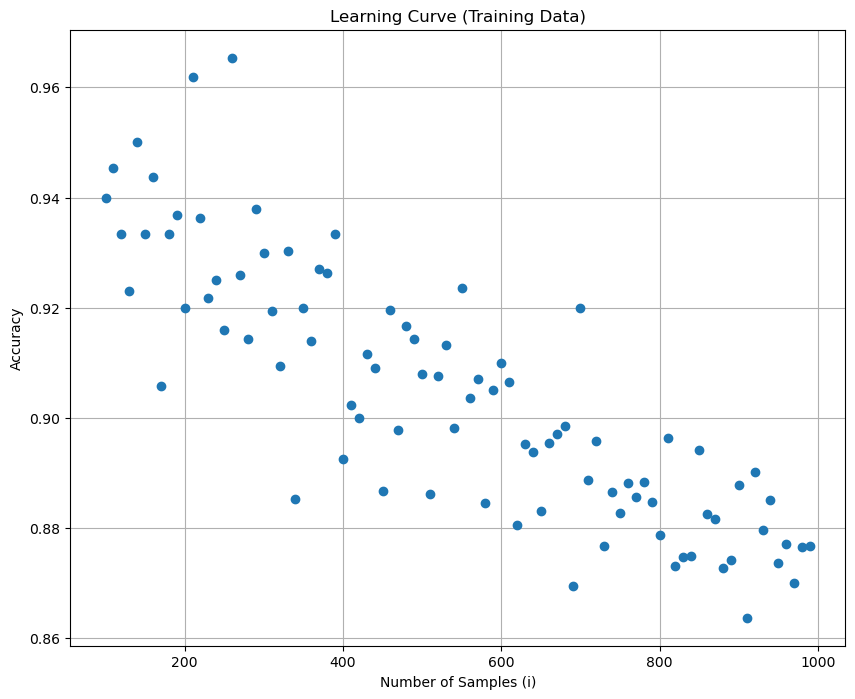

In [69]:
plt.figure(figsize=(10, 8))

plt.subplot(1, 1, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(li1, li2, 'o')
plt.title('Learning Curve (Training Data)')
plt.xlabel('Number of Samples (i)')
plt.ylabel('Accuracy')
plt.grid(True)

In [70]:
li1=[]
li2=[]
li3=[]

for i in range(100,1000,10):
    df2= X_train.sample(n=i)
    ytr = y_train.loc[df2.index]
    model = LinearSVC()
    model.fit(df2, ytr)
    ypred1 = model.predict(Xhold)
    ypred2 = model.predict(Xval)
    li1.append(i)
    li2.append( accuracy_score(yhold, ypred1))
    li3.append( accuracy_score(Yval, ypred2))

/Users/aseemmishra/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aseemmishra/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aseemmishra/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/aseemmishra/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


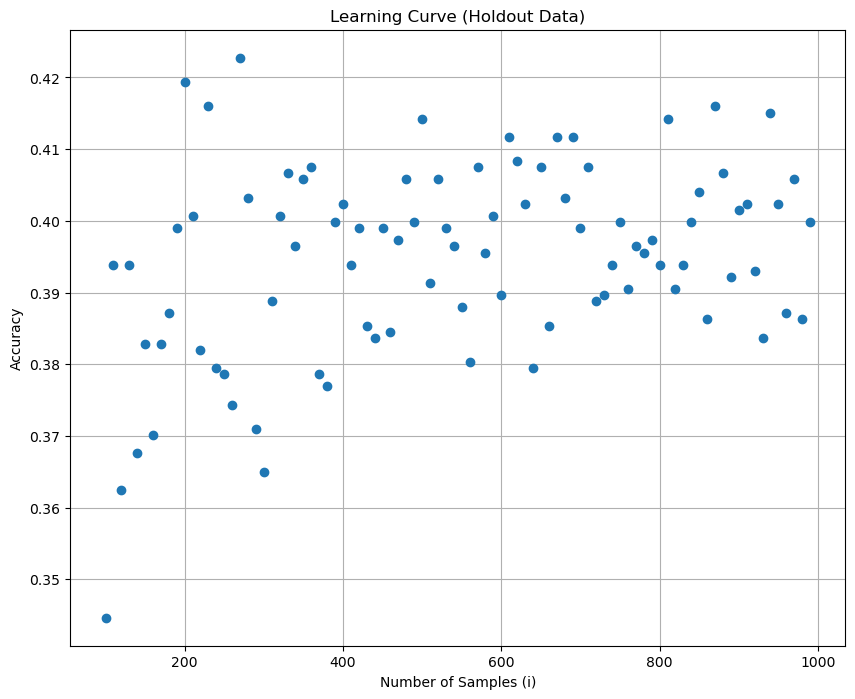

In [75]:
plt.figure(figsize=(10, 8))

plt.subplot(1, 1, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(li1, li2, 'o')
plt.title('Learning Curve (Holdout Data)')
plt.xlabel('Number of Samples (i)')
plt.ylabel('Accuracy')
plt.grid(True)

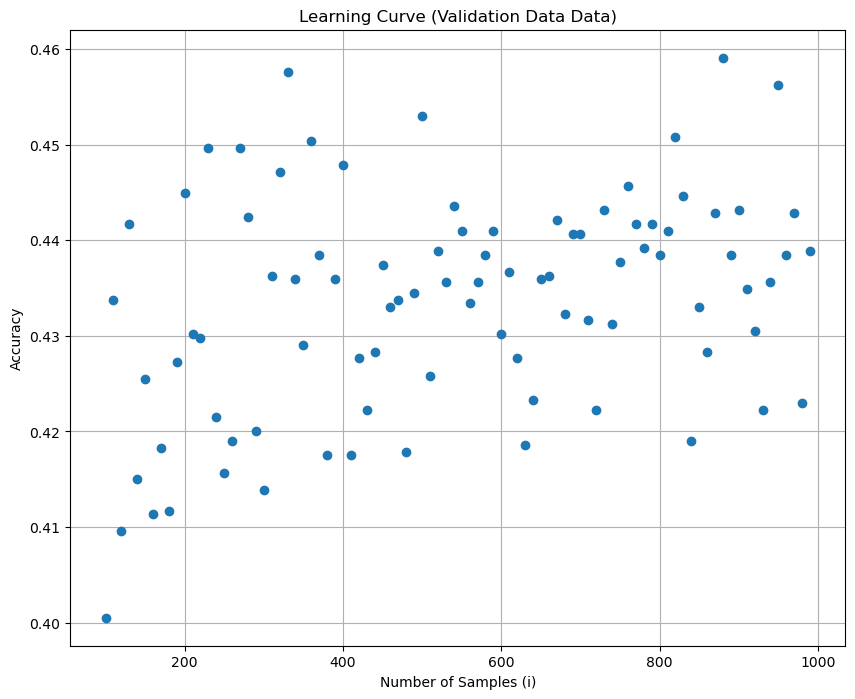

In [76]:
plt.figure(figsize=(10, 8))

plt.subplot(1, 1, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(li1, li3, 'o')
plt.title('Learning Curve (Validation Data Data)')
plt.xlabel('Number of Samples (i)')
plt.ylabel('Accuracy')
plt.grid(True)

# KMeans

In [53]:
from sklearn import cluster

### Implementing KMeans and Elbow Method

In [55]:
Ks, objs = range(1,9), []
for k in Ks:
    model = cluster.KMeans(n_clusters=k)
    model.fit(X_train)
    objs.append(-model.score(X_train))



/Users/aseemmishra/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aseemmishra/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aseemmishra/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aseemmishra/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

### Plotting Elbow Method

Text(0, 0.5, 'Objective Function Value')

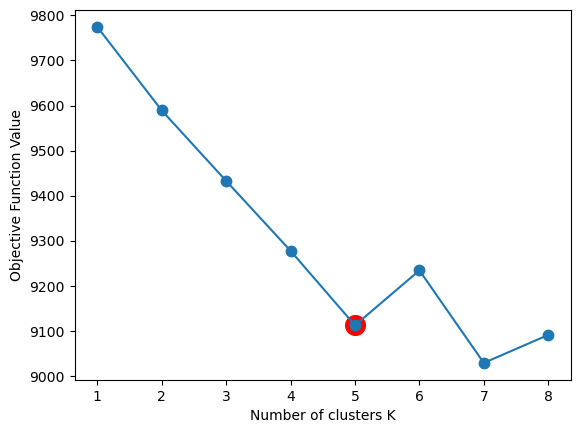

In [56]:
plt.plot(Ks, objs, '.-', markersize=15)
plt.scatter([5], [objs[4]], s=200, c='r')
plt.xlabel("Number of clusters K")
plt.ylabel("Objective Function Value")